This is my approach to linear regression problem. 

[np.float64(1.4599048136743427), np.float64(-0.8441366404900642), np.float64(0.8693620681894935), np.float64(-0.5732365862646621), np.float64(-0.986578838681406), np.float64(-0.7223694295118057), np.float64(0.8441366404900645), np.float64(788.25)]


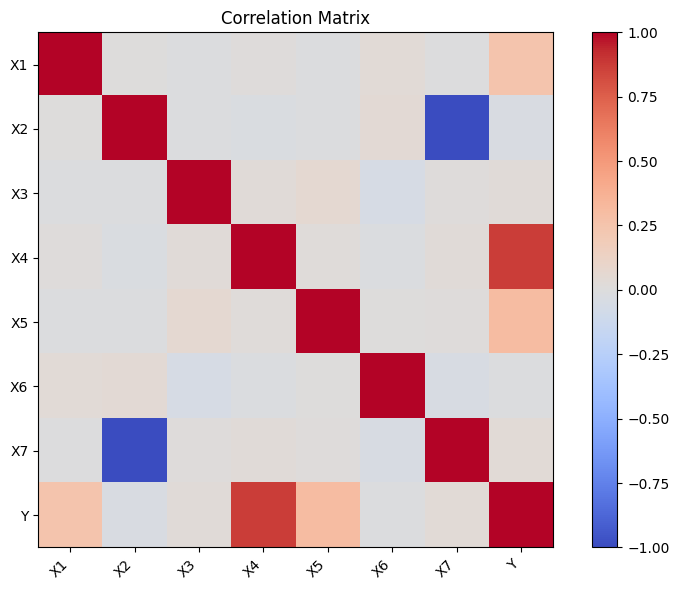

In [16]:
import numpy as np
from linear_regression import filename, LinearRegressionModel, StopCondition, RidgeRegressionFunction, Uninomial, \
    QuadraticLossFunction, Linear, LassoRegressionFunction, Zeros, Custom, Gaussian, ElasticNetworkLossFunction

model = LinearRegressionModel(filename, True)
print(model.train[1])
model.corr()

In [21]:
a, b = model.estimate_coef(0.01)
print(a, b)
assert a >= 0 and b >= 0
model.set_parameters(loss_function=ElasticNetworkLossFunction(a, b), base_function=Custom())
model.set_parameters(eta=0.01, stop=0.25, rep_count=10000, condition=StopCondition.Both)
model.set_parameters(mini_batch=True   , batch_size=64, print_c=200)
# model.linear_regression()

0.0001 5


In [17]:
model.linear_regression()

50: Gradient: 847.7653537975335, MSE: 373470.35226188845
100: Gradient: 659.255761752755, MSE: 231917.65760294316
150: Gradient: 512.734538356425, MSE: 146306.07354918134
200: Gradient: 398.8197494174106, MSE: 94515.2368411406
250: Gradient: 310.23943101434406, MSE: 63178.4004778462
300: Gradient: 241.35032017731814, MSE: 44214.64865664091
350: Gradient: 187.76978552525506, MSE: 32737.052630896596
400: Gradient: 146.0925857725657, MSE: 25789.541679965387
450: Gradient: 113.67206551763442, MSE: 21583.676653358416
500: Gradient: 88.4507250872572, MSE: 19037.276584343283
550: Gradient: 68.82882841950435, MSE: 17495.429239999645
600: Gradient: 53.56241466990085, MSE: 16561.748787336004
650: Gradient: 41.68408673618862, MSE: 15996.296009313013
700: Gradient: 32.4414663905172, MSE: 15653.816295180242
750: Gradient: 25.24936350254484, MSE: 15446.366412338386
800: Gradient: 19.652596708054645, MSE: 15320.696627524694
850: Gradient: 15.297089682255146, MSE: 15244.561080300495
900: Gradient: 11.

[np.float64(954.0583741816725),
 np.float64(128.90748900183752),
 np.float64(-1.7501572302790986),
 np.float64(-6.224727669347803),
 np.float64(453.2068943283561),
 np.float64(149.97887488367274),
 np.float64(-1.3280571516410027),
 np.float64(1.7501572302792139)]

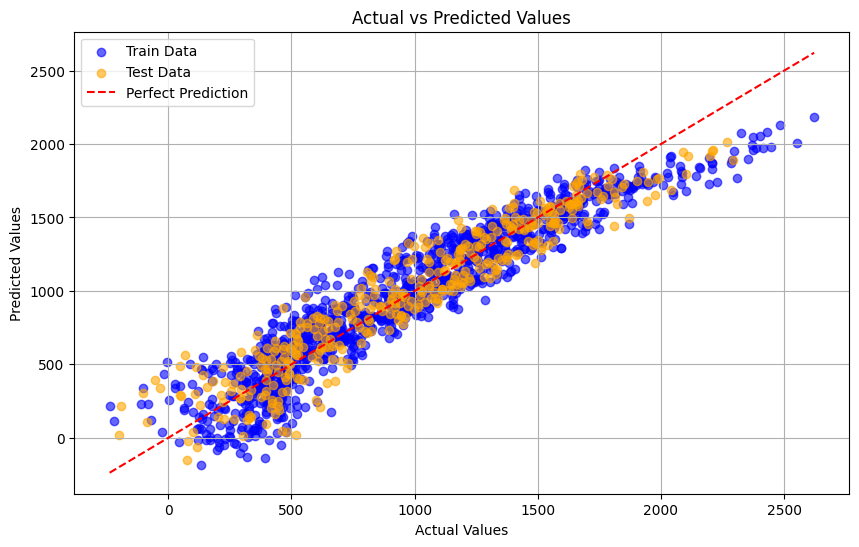

Train Set MSE: 15153.023155207598
Test Set MSE: 14100.736826811188


In [18]:
model.print_results()
model.results()

In [15]:
model.set_parameters(base_function=Linear())
model.solve_analytically(0.00001)
print(model.theta)

[959.94521301 136.85581685  -7.50668001 -11.70744273 464.44423387
 155.66267263   3.22122004   7.50668669]


In [7]:
from random import randrange
i = randrange(0, len(model.test) - 1, 1)
p = model.prediction([1, *[model.test[i][j] for j in range(len(model.test[0]) - 1)]])
a = model.test[i][-1]
np.set_printoptions(precision=2)
print(f"prediction: {"%0.2f" %  p}. actual: {"%0.2f" %  a}, error = {"%0.2f" % (abs(p - a) / a * 100)}%")

TypeError: must be real number, not NoneType